In [1]:
from spotify import *

In [16]:
import pandas as pd 

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
import datetime as dt

In [2]:
scope:str = "user-library-read " \
"playlist-read-private " \
"playlist-read-collaborative " \
"user-top-read user-read-private " \
"user-read-email"

In [3]:
auth_code = fetch_auth_code(scope)

In [4]:
token_details = fetch_token(auth_code)

In [5]:
me = SpotifyUser(get_user())

In [6]:
library_size = get_total_songs()

In [7]:
library_size

2551

In [8]:
link_list = generate_link_list(0, 50, library_size)

In [ ]:
link_list

In [10]:
all_songs = get_all_song_titles(link_list, 50, 4)

In [ ]:
all_songs

In [12]:
top_link_list = generate_top_link_list(library_size)

In [ ]:
top_link_list

In [14]:
all_top_songs = get_all_top_song_titles(top_link_list, 50, 5)

In [ ]:
all_top_songs

In [18]:
all_songs = pd.DataFrame(all_songs)
top_songs = pd.DataFrame(all_top_songs)

In [ ]:
all_songs

In [30]:
s = all_songs.popularity
t = top_songs.popularity

print(s.mean().__round__(2))
print(s.median().__round__(2))

print(t.mean().__round__(2))
print(t.median().__round__(2))

59.03
63.0
60.73
63.0


In [31]:
all_songs.to_csv("all_songs.csv")

In [32]:
top_songs.to_csv("top_songs.csv")

In [34]:
historical_songs = pd.read_csv('daily_dumps/song_stats.csv')

In [42]:
historical_songs['run_date'] = pd.to_datetime(historical_songs.run_date)

In [46]:
df = historical_songs.groupby(historical_songs.run_date.dt.strftime('%B')).mean()

<Axes: title={'center': 'My Popularity Score Over Time'}, xlabel='Month', ylabel='Popularity Score'>

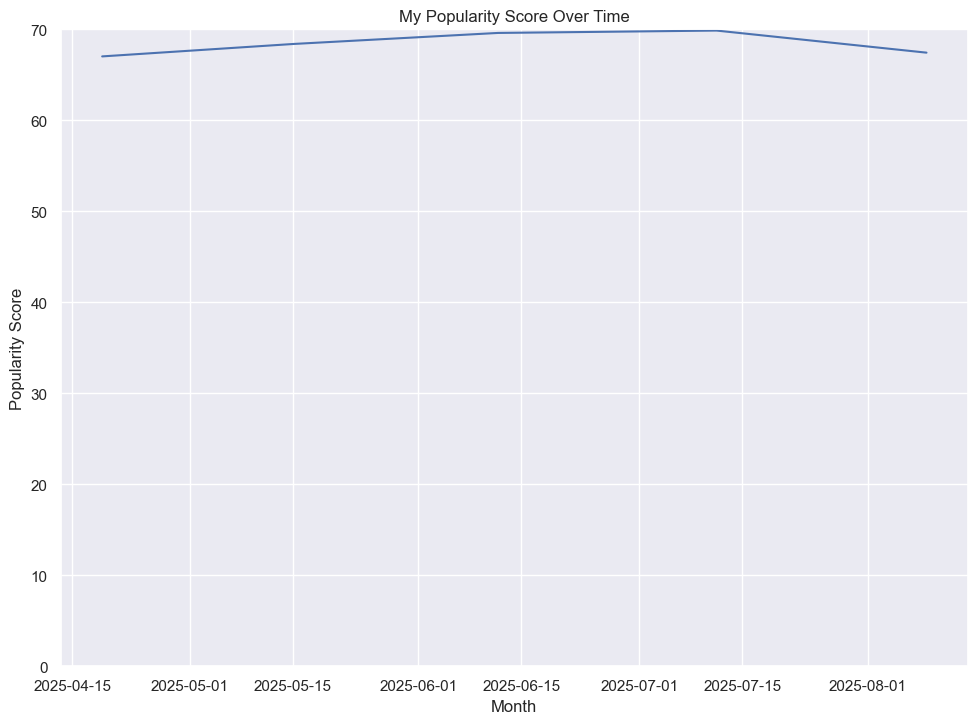

In [77]:
sns.set_style("whitegrid")
sns.set_context("talk")
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})
d = sns.lineplot(df, x='run_date', y='most_listened_pop_score')
d.set_ylim(0,70)
d.set_xlabel("Month")
d.set_ylabel("Popularity Score")
d.set_title("My Popularity Score Over Time")
d


In [66]:
d.set_ylim(0,70)

(0.0, 70.0)

In [82]:
d.get_figure().savefig("my_plot.png")